In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [180]:
sc = pd.read_csv('streetcar-data.csv')

In [181]:
sc

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle
0,1-Jan-24,505,02:45,Monday,DUNDAS AND MCCAUL,Security,10,20,W,4416
1,1-Jan-24,505,03:06,Monday,COLLEGE AND GLADSTONE,Emergency Services,52,72,E,4461
2,1-Jan-24,503,03:21,Monday,PARLIAMENT AND SHUTTER,Security,0,0,N,4545
3,1-Jan-24,505,03:53,Monday,DUNDAS WEST STATION,Security,37,0,W,4551
4,1-Jan-24,600,04:27,Monday,QUEEN AND BATHURST,Diversion,78,93,E,8116
...,...,...,...,...,...,...,...,...,...,...
13103,30-Nov-24,501,22:53,Saturday,QUEEN AND UNIVERSITY,Diversion,88,98,NaN,4514
13104,30-Nov-24,511,23:57,Saturday,GERRARD AND HAMILTON,Collision - TTC Involved,0,0,E,4466
13105,30-Nov-24,505,23:57,Saturday,DUNDAS AND JARVIS,Diversion,10,20,E,4575
13106,30-Nov-24,501,00:42,Saturday,QUEEN AND STRACHAN,Cleaning - Unsanitary,10,20,W,4629


In [182]:
# Check missing data
sc.isnull().sum()

Date            0
Line          145
Time            0
Day             0
Location        1
Incident        0
Min Delay       0
Min Gap         0
Bound        1921
Vehicle         0
dtype: int64

In [183]:
# Data Cleaning
sc.dropna(axis=0, inplace=True)
# No Streetcar for that specific event
sc = sc[sc["Bound"] != '8']
# Get the count of each location
location_counts = sc["Location"].value_counts()

# Filter locations that occur more than once
locations_to_keep = location_counts[location_counts > 1].index

# Filter the dataframe to keep only rows with locations that occur more than once
sc = sc[sc["Location"].isin(locations_to_keep)]

sc

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle
0,1-Jan-24,505,02:45,Monday,DUNDAS AND MCCAUL,Security,10,20,W,4416
1,1-Jan-24,505,03:06,Monday,COLLEGE AND GLADSTONE,Emergency Services,52,72,E,4461
2,1-Jan-24,503,03:21,Monday,PARLIAMENT AND SHUTTER,Security,0,0,N,4545
3,1-Jan-24,505,03:53,Monday,DUNDAS WEST STATION,Security,37,0,W,4551
4,1-Jan-24,600,04:27,Monday,QUEEN AND BATHURST,Diversion,78,93,E,8116
...,...,...,...,...,...,...,...,...,...,...
13102,30-Nov-24,506,21:46,Saturday,HOWARD PARK AND RONCES,Emergency Services,33,43,E,4415
13104,30-Nov-24,511,23:57,Saturday,GERRARD AND HAMILTON,Collision - TTC Involved,0,0,E,4466
13105,30-Nov-24,505,23:57,Saturday,DUNDAS AND JARVIS,Diversion,10,20,E,4575
13106,30-Nov-24,501,00:42,Saturday,QUEEN AND STRACHAN,Cleaning - Unsanitary,10,20,W,4629


In [184]:
sc_date_counts

Date
1-Jun-24     64
13-May-24    52
9-Apr-24     52
1-Jan-24     49
16-May-24    47
             ..
18-Nov-24    13
9-Jun-24     12
12-Aug-24    12
14-Nov-24    10
22-Oct-24    10
Name: count, Length: 335, dtype: int64

Delays occurred in a day

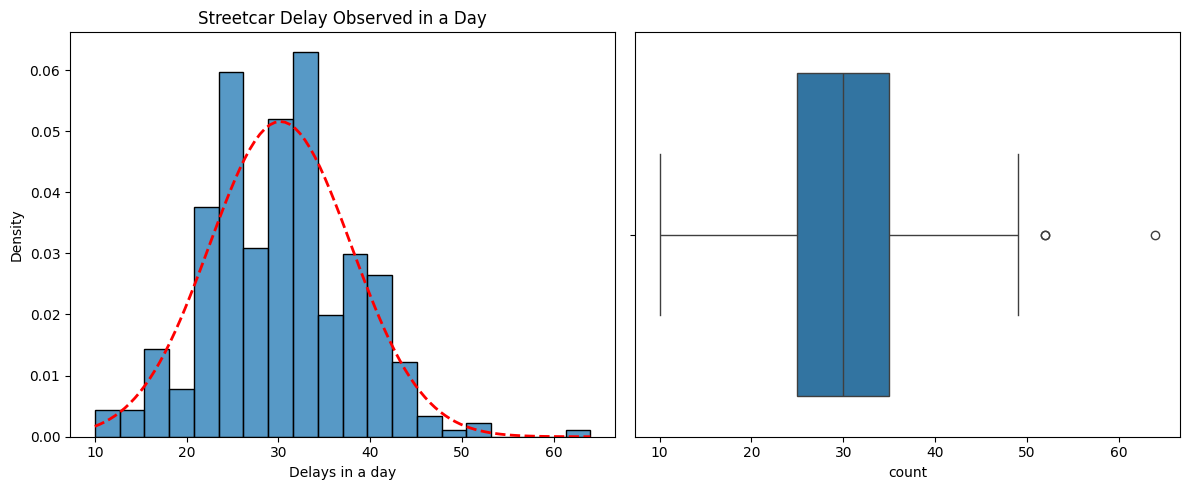

In [185]:
sc_date_counts = sc['Date'].value_counts()
# Fit a normal distribution
mu, sigma = np.mean(sc_date_counts), np.std(sc_date_counts)
x = np.linspace(min(sc_date_counts), max(sc_date_counts), 100)
y = stats.norm.pdf(x, mu, sigma)

# Plot histogram with normal distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of delay counts
sns.histplot(sc_date_counts, ax=ax[0], bins=20, kde=False, stat="density")
ax[0].plot(x, y, color='red', linestyle='dashed', linewidth=2)  # Normal distribution line
ax[0].set_xlabel("Delays in a day")
ax[0].set_ylabel("Density")
ax[0].set_title("Streetcar Delay Observed in a Day")

# Boxplot
sns.boxplot(x=sc_date_counts, ax=ax[1])

plt.tight_layout()
plt.show()

Delays in minutes

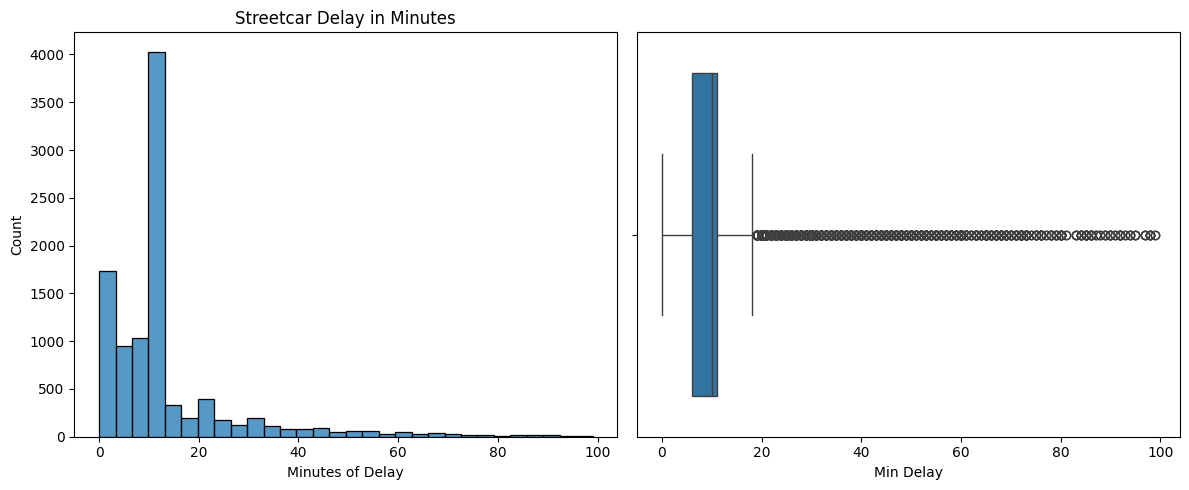

In [186]:
# Filter out extreme delays (keeping <100 minutes)
filtered_delays = sc[sc['Min Delay'] < 100]['Min Delay']

# Plot histogram and boxplot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of delay times
sns.histplot(filtered_delays, ax=ax[0], bins=30, kde=False, stat="count")
ax[0].set_xlabel("Minutes of Delay")
ax[0].set_ylabel("Count")
ax[0].set_title("Streetcar Delay in Minutes")

# Boxplot
sns.boxplot(x=filtered_delays, ax=ax[1])

plt.tight_layout()
plt.show()


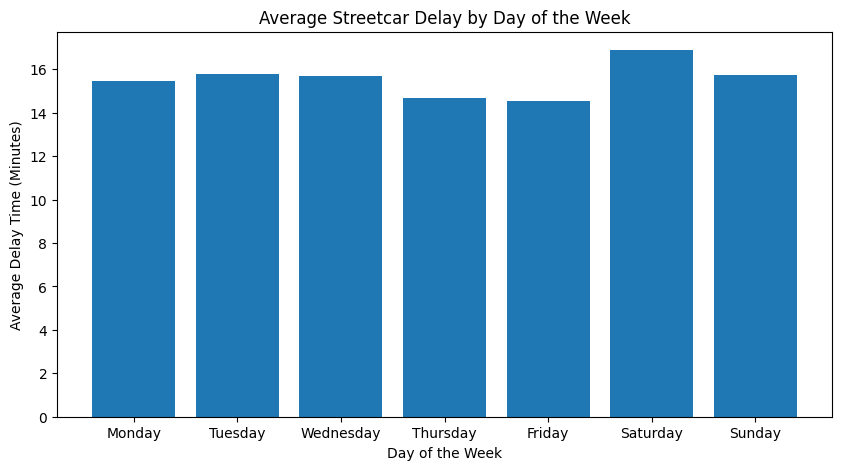

In [187]:
# Calculate average delay per day
avg_delay_per_day = sc.groupby("Day")["Min Delay"].mean()

# Ensure days are in correct order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_delay_per_day = avg_delay_per_day.reindex(day_order)  # Reorder index

# Plot
plt.figure(figsize=(10, 5))
plt.bar(avg_delay_per_day.index, avg_delay_per_day.values) 

# Labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Average Delay Time (Minutes)")
plt.title("Average Streetcar Delay by Day of the Week")
#plt.xticks(rotation=45) 
plt.show()

In [188]:
sc["Date"] = pd.to_datetime(sc["Date"], dayfirst=False) 
sc["Month"] = sc["Date"].dt.strftime("%B")

C:\Users\Elowe\AppData\Local\Temp\ipykernel_13536\627174662.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sc["Date"] = pd.to_datetime(sc["Date"], dayfirst=False)


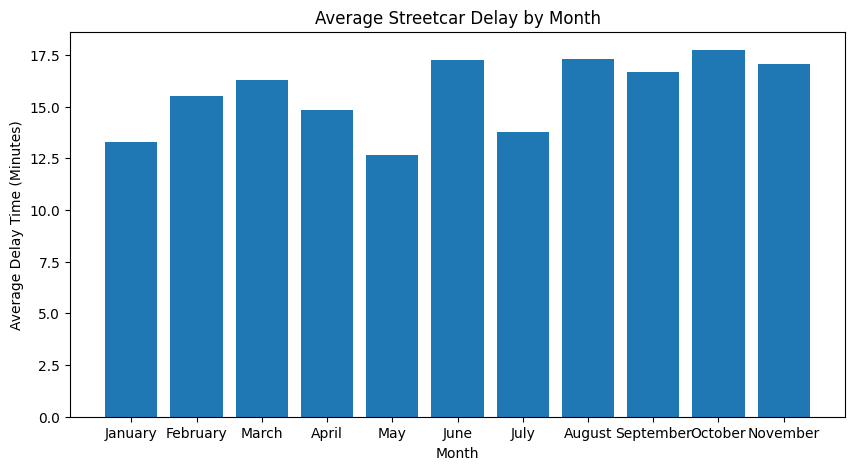

In [189]:
# Define month order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Group by month and calculate average delay
avg_delay_per_month = sc.groupby("Month")["Min Delay"].mean().reindex(month_order) 

# Plot
plt.figure(figsize=(10, 5))
plt.bar(avg_delay_per_month.index, avg_delay_per_month.values) 

# Labels and title
plt.xlabel("Month")
plt.ylabel("Average Delay Time (Minutes)")
plt.title("Average Streetcar Delay by Month")
plt.show()

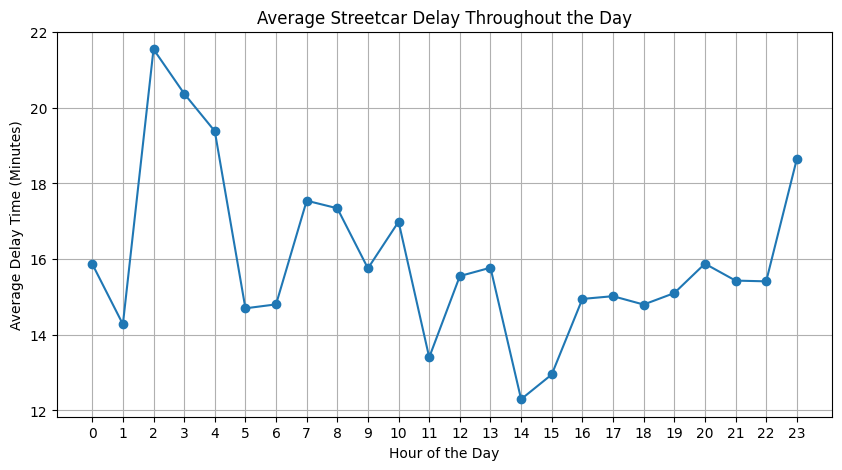

In [190]:
sc["Hour"] = sc["Time"].str[:2].astype(int)
# Group by 'Hour' and calculate the average delay time
avg_delay_per_hour = sc.groupby("Hour")["Min Delay"].mean()

# Plotting the line plot
plt.figure(figsize=(10, 5))
plt.plot(avg_delay_per_hour.index, avg_delay_per_hour.values, marker="o", linestyle="-")

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Average Delay Time (Minutes)")
plt.title("Average Streetcar Delay Throughout the Day")
plt.xticks(range(0, 24))  # Ensure all hours (0-23) appear on the x-axis
plt.grid(True)  # Add grid for better readability

plt.show()

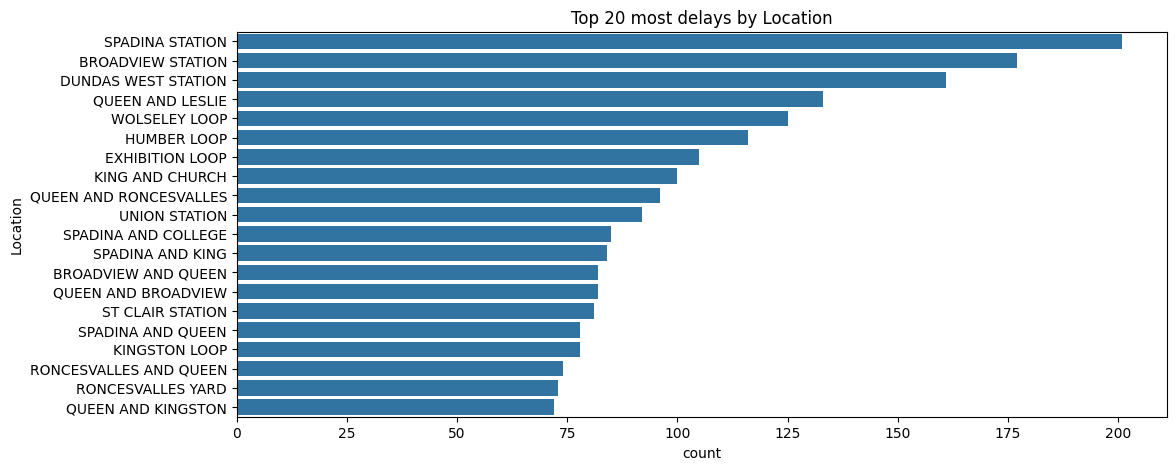

In [191]:
plt.figure(figsize=(12,5))
sns.countplot(y=sc['Location'], order= sc['Location'].value_counts().iloc[:20].index);
plt.title("Top 20 most delays by Location");

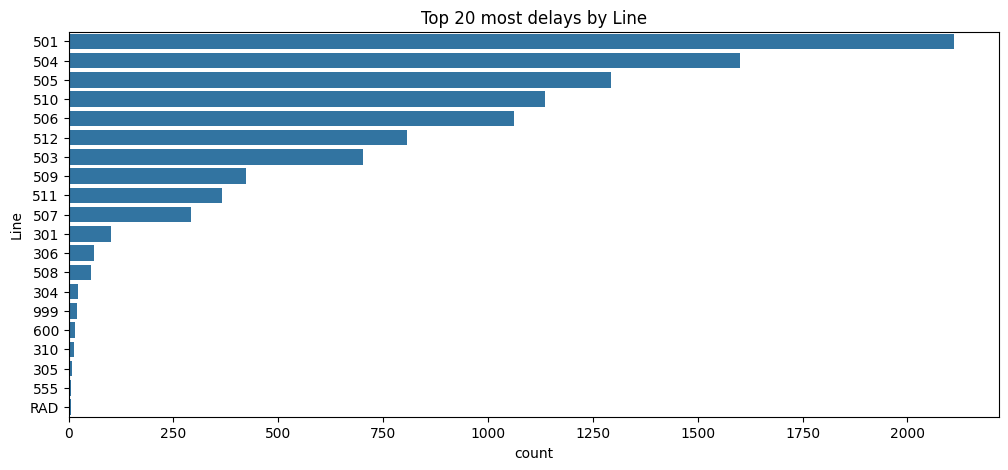

In [192]:
plt.figure(figsize=(12,5))
sns.countplot(y=sc['Line'], order= sc['Line'].value_counts().iloc[:20].index);
plt.title("Top 20 most delays by Line");

C:\Users\Elowe\AppData\Local\Temp\ipykernel_13536\1589882477.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Incident', y='Min Delay', data= sc, ci=None);


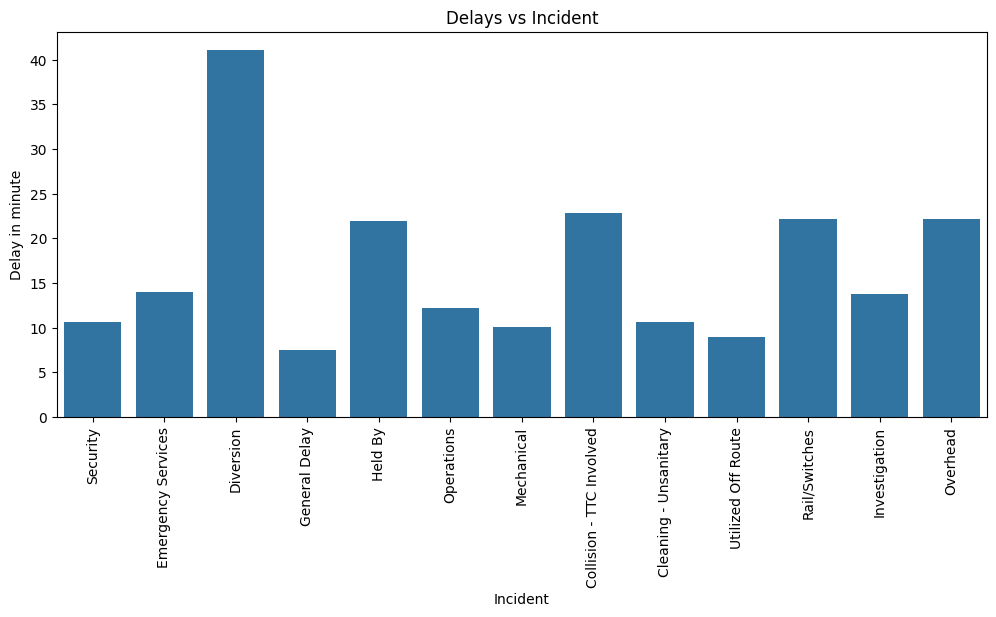

In [193]:
plt.figure(figsize=(12,5))
sns.barplot(x='Incident', y='Min Delay', data= sc, ci=None);
plt.title("Delays vs Incident")
plt.xlabel("Incident")
plt.ylabel("Delay in minute");
plt.xticks(rotation=90);

C:\Users\Elowe\AppData\Local\Temp\ipykernel_13536\1490277223.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Bound', y='Min Delay', data= sc, ci=None);


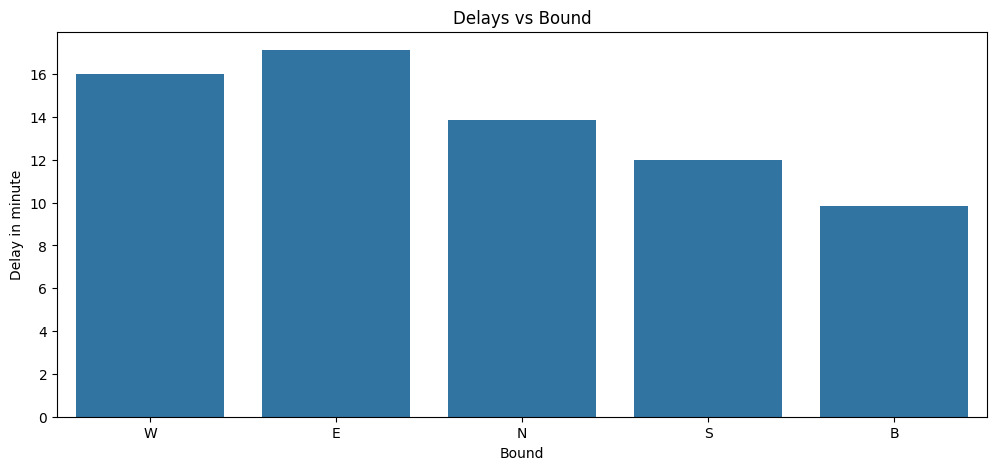

In [194]:
plt.figure(figsize=(12,5))
sns.barplot(x='Bound', y='Min Delay', data= sc, ci=None);
plt.title("Delays vs Bound")
plt.xlabel("Bound")
plt.ylabel("Delay in minute");

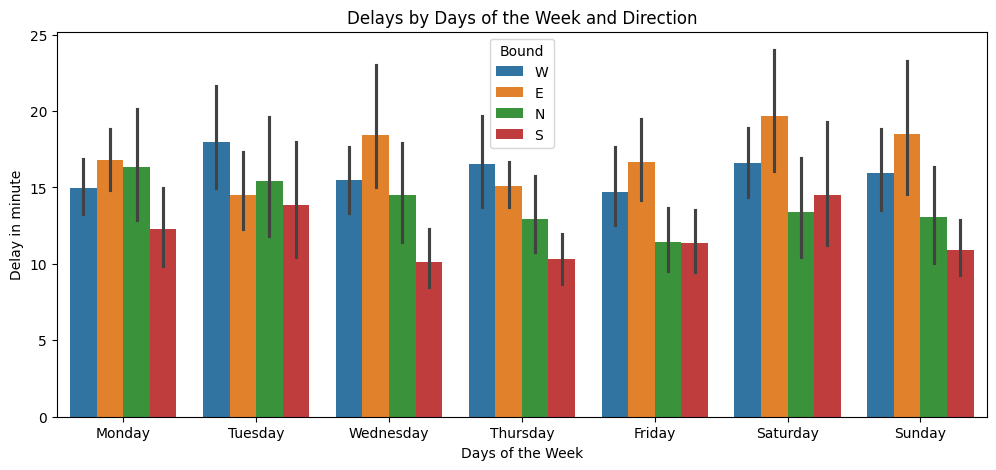

In [196]:
sc_no_B = sc[sc['Bound']!='B']
plt.figure(figsize=(12,5))
sns.barplot(x='Day', y='Min Delay',hue='Bound', data=sc_no_B);
plt.title("Delays by Days of the Week and Direction")
plt.xlabel("Days of the Week")
plt.ylabel("Delay in minute");